In [ ]:

import tensorflow as tf
import os
import shutil
import numpy as np
import glob as glob
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/mu2mech_final_data_with_testing.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_90.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_100.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_110.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_120.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_130.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_140.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_150.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_160.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_170.00.png  
  inflating: /content/mu2mech_final_data/Test_images/10time_step/0.485%/output_180.00.png  
  inflating: /content/mu2mech_

# **Testing for 1 composition using 1st model**

In [ ]:
model_1 = load_model('/content/drive/MyDrive/New_models_Mu2Mech/1th_time_step/Reconstruction_model_4/autoencoder.hdf5')
layer_name = 'max_pooling2d_2'
encoder_1 = tf.keras.Model(inputs=model_1.input,
                                       outputs=model_1.get_layer(layer_name).output)
layer_name = 'conv2d_6'
decoder_1 = tf.keras.Model(inputs=encoder_1.output,outputs=model_1.get_layer(layer_name).output)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         580       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 4)        0

In [ ]:
lstm_model_1 = load_model('/content/drive/MyDrive/New_models_Mu2Mech/1th_time_step/LSTM_Model_2/lstm_model_1.hdf5')

In [ ]:
# Take one composition for testing
test_images_1 = []
from tkinter import Tcl
from PIL import Image

X = glob.glob("/content/mu2mech_final_data/Test_images/1time_step/0.46%" +"/*.png")
X_sorted = Tcl().call('lsort', '-dict', X)
print(len(X_sorted))

for i,path in enumerate(X_sorted[1:]):
  image = cv2.imread(X_sorted[i])
  img = np.array(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype("float32") / 255
  test_images_1.append(img)

# Converting to a numpy array
test_images_1 = np.array(test_images_1)
print(test_images_1.shape)


1001
(1000, 128, 128, 3)


In [ ]:
X_test_1 = test_images_1
print(X_test_1.shape)

#Make a separate Y_val for comparing the predicted images
Y_test_1 = test_images_1[40:]

encoded_images = encoder_1.predict(X_test_1)

print(encoded_images.shape)

convlstm_input = []

for i in range(0,960):
  temp = encoded_images[i:i+40,...]
  convlstm_input.append(temp)

convlstm_input = np.array(convlstm_input)

# Input is a 5D array - (samples, time_steps, H,W,filters)
convlstm_input.shape

# Inputs for the ConvLSTM model
X_1 = convlstm_input

print(X_1.shape)

preds_1 = lstm_model_1.predict(X_1)
predictions_1 = decoder_1.predict(preds_1)


(1000, 128, 128, 3)
32/32 [==============================] - 0s 5ms/step
(1000, 16, 16, 4)
(960, 40, 16, 16, 4)
30/30 [==============================] - 0s 5ms/step


In [ ]:
predictions_1.shape

(960, 128, 128, 3)

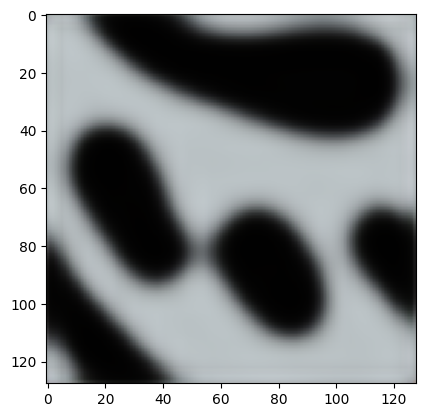

In [ ]:
plt.imshow(predictions_1[370])

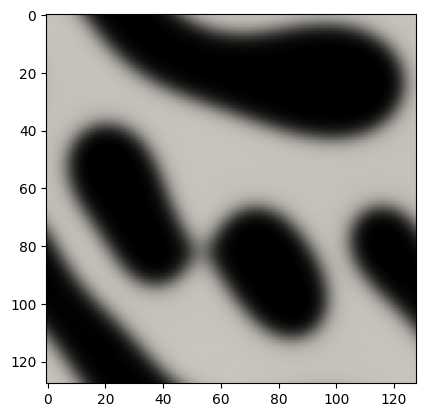

In [ ]:
plt.imshow(Y_test_1[370])

# **Testing with t=5 model**

In [ ]:
model_5 = load_model("/content/drive/MyDrive/New_models_Mu2Mech/5th_time_step/Reconstruction_model_3/autoencoder.hdf5")


layer_name = 'max_pooling2d_2'
encoder_5 = tf.keras.Model(inputs=model_5.input,
                                       outputs=model_5.get_layer(layer_name).output)
layer_name = 'conv2d_6'
decoder_5 = tf.keras.Model(inputs=encoder_5.output,outputs=model_5.get_layer(layer_name).output)

In [ ]:
lstm_model_5 = load_model('/content/drive/MyDrive/New_models_Mu2Mech/5th_time_step/ConvLSTM_2/lstm_model_5.hdf5')

In [ ]:
# Take one composition for testing
test_images_5 = []
from tkinter import Tcl
from PIL import Image

X = glob.glob("/content/mu2mech_final_data/Test_images/5time_step/0.46%" +"/*.png")
X_sorted = Tcl().call('lsort', '-dict', X)
print(len(X_sorted))

for i,path in enumerate(X_sorted[1:]):
  image = cv2.imread(X_sorted[i])
  img = np.array(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype("float32") / 255
  test_images_5.append(img)

# Converting to a numpy array
test_images_5 = np.array(test_images_5)
print(test_images_5.shape)


X_test_5 = test_images_5
print(X_test_5.shape)

#Make a separate Y_val for comparing the predicted images
Y_test_5 = test_images_5[40:]

encoded_images = encoder_5.predict(X_test_5)

print(encoded_images.shape)

convlstm_input = []

for i in range(0,960):
  temp = encoded_images[i:i+40,...]
  convlstm_input.append(temp)

convlstm_input = np.array(convlstm_input)

# Input is a 5D array - (samples, time_steps, H,W,filters)
convlstm_input.shape

# Inputs for the ConvLSTM model
X_5 = convlstm_input

print(X_5.shape)

preds_5 = lstm_model_5.predict(X_5)
predictions_5 = decoder_5.predict(preds_5)


1001
(1000, 128, 128, 3)
(1000, 128, 128, 3)
32/32 [==============================] - 0s 5ms/step
(1000, 16, 16, 4)
(960, 40, 16, 16, 4)
30/30 [==============================] - 0s 5ms/step


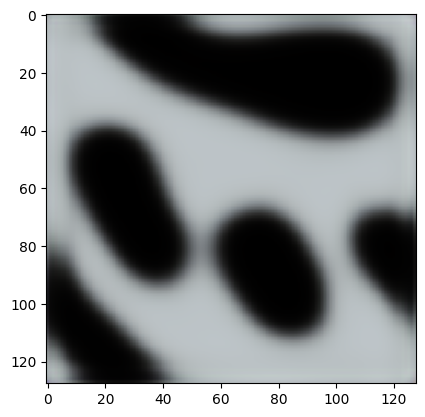

In [ ]:
plt.imshow(predictions_5[42])

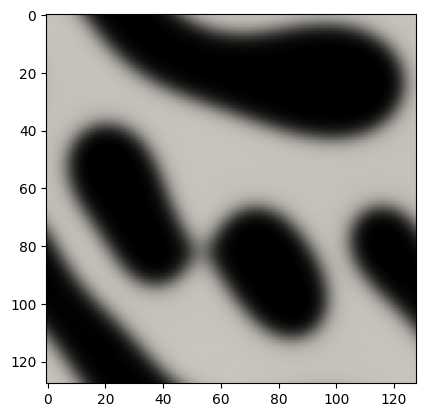

In [ ]:
plt.imshow(Y_test_5[42])

# **Testing with the t=10 Model**

In [ ]:
model_10 = load_model("/content/drive/MyDrive/New_models_Mu2Mech/10th_time_step/Reconstruction_model_2/autoencoder.hdf5")

layer_name = 'max_pooling2d_2'
encoder_10 = tf.keras.Model(inputs=model_10.input,
                                       outputs=model_10.get_layer(layer_name).output)
layer_name = 'conv2d_6'
decoder_10 = tf.keras.Model(inputs=encoder_10.output,outputs=model_10.get_layer(layer_name).output)

In [ ]:
lstm_model_10 = load_model('/content/drive/MyDrive/New_models_Mu2Mech/10th_time_step/ConvLSTM/lstm_model_10.hdf5')

In [ ]:
# Take one composition for testing
test_images_10 = []
from tkinter import Tcl
from PIL import Image

X = glob.glob("/content/mu2mech_final_data/Test_images/10time_step/0.46%" +"/*.png")
X_sorted = Tcl().call('lsort', '-dict', X)
print(len(X_sorted))

for i,path in enumerate(X_sorted[1:]):
  image = cv2.imread(X_sorted[i])
  img = np.array(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype("float32") / 255
  test_images_10.append(img)

# Converting to a numpy array
test_images_10 = np.array(test_images_10)
print(test_images_10.shape)


X_test_10 = test_images_10
print(X_test_10.shape)

#Make a separate Y_val for comparing the predicted images
Y_test_10 = test_images_10[40:]

encoded_images = encoder_10.predict(X_test_10)

print(encoded_images.shape)

convlstm_input = []

for i in range(0,960):
  temp = encoded_images[i:i+40,...]
  convlstm_input.append(temp)

convlstm_input = np.array(convlstm_input)

# Input is a 5D array - (samples, time_steps, H,W,filters)
convlstm_input.shape

# Inputs for the ConvLSTM model
X_10 = convlstm_input

print(X_10.shape)

preds_10 = lstm_model_10.predict(X_10)
predictions_10 = decoder_10.predict(preds_10)


1001
(1000, 128, 128, 3)
(1000, 128, 128, 3)
32/32 [==============================] - 1s 10ms/step
(1000, 16, 16, 4)
(960, 40, 16, 16, 4)
30/30 [==============================] - 1s 9ms/step


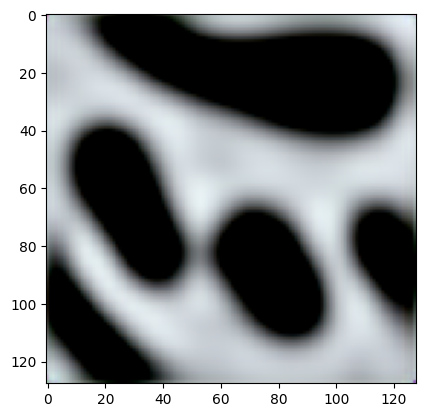

In [ ]:
plt.imshow(predictions_10[1])

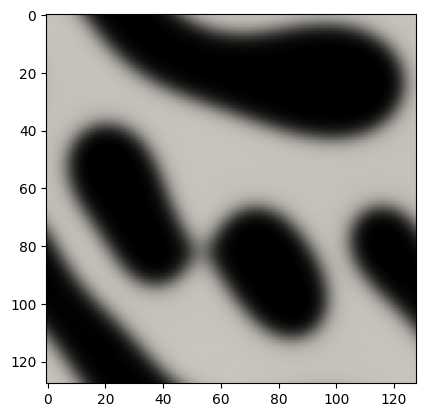

In [ ]:
plt.imshow(Y_test_10[1])

# **Comparison**

In [ ]:
all_predictions = []
all_predictions.append(predictions_1[370])
all_predictions.append(predictions_5[42])
all_predictions.append(predictions_10[1])

In [ ]:
initial_images = []
initial_images.append(Y_test_1[370])
initial_images.append(Y_test_5[42])
initial_images.append(Y_test_10[1])


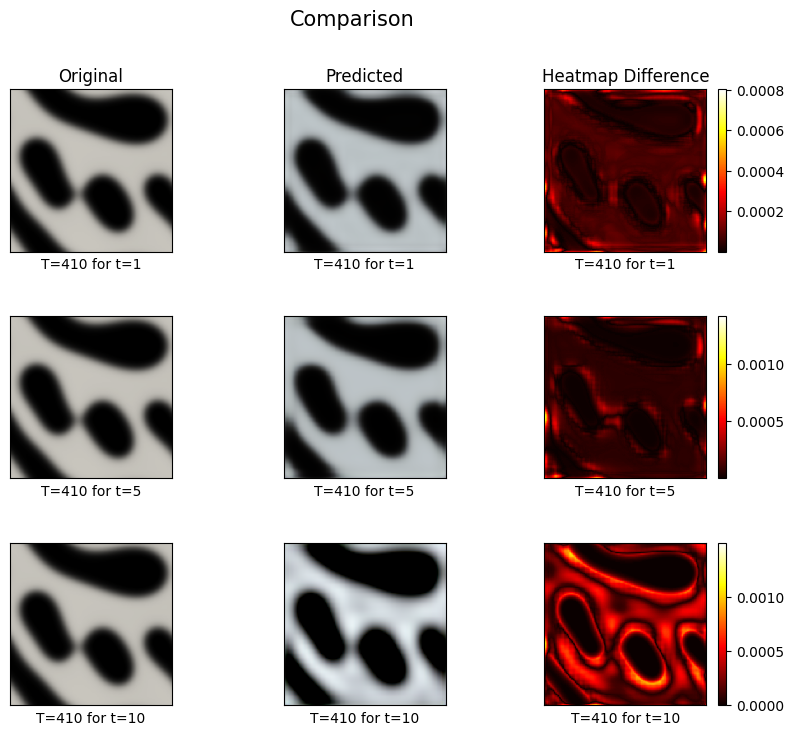

In [ ]:
pred_imgs = []
heatmaps = []
original_imgs = []
for i in range(0,3):
  original_imgs.append(initial_images[i])
  pred_imgs.append(all_predictions[i])

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(initial_images[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(all_predictions[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])


# Generate random images for demonstration (replace with your own images)
original_images = initial_images
prediction_images = all_predictions

# Create a grid of subplots
fig, axs = plt.subplots(3,3,figsize=(10,8))

for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid
t = [1, 5, 10]
for i in range(0,3):
  for j in range(0,3):
    if j==0 :
      h=axs[i,0].imshow(original_imgs[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])

    elif j==1 :
      h=axs[i,1].imshow(prediction_images[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    else:
      h = axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      fig.colorbar(h, ax=axs[i,2])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    axs[i,j].set_xlabel(f"T=410 for t={t[i]}")

# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.4, wspace=0.2)


fig.suptitle("Comparison", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Predicted')
axs[0,2].title.set_text('Heatmap Difference')


plt.show()

# **Predicted T+10th frame = 420th frame from the 3 models**

In [ ]:
def encoder_input_1(X_test):

  # 1. Encode the images .
  encoded_images = encoder_1.predict(X_test)
  # Shape - (None, 16, 16, 4)
  convlstm_input = []

  for i in range(0,960):
    temp = encoded_images[i:i+40,...]
    convlstm_input.append(temp)

  convlstm_input = np.array(convlstm_input)
  return convlstm_input

In [ ]:
def encoder_input_5(X_test):

  # 1. Encode the images .
  encoded_images = encoder_5.predict(X_test)
  # Shape - (None, 16, 16, 4)
  convlstm_input = []

  for i in range(0,960):
    temp = encoded_images[i:i+40,...]
    convlstm_input.append(temp)

  convlstm_input = np.array(convlstm_input)
  return convlstm_input

In [ ]:
def encoder_input_10(X_test):

  # 1. Encode the images .
  encoded_images = encoder_10.predict(X_test)
  # Shape - (None, 16, 16, 4)
  convlstm_input = []

  for i in range(0,960):
    temp = encoded_images[i:i+40,...]
    convlstm_input.append(temp)

  convlstm_input = np.array(convlstm_input)
  return convlstm_input

In [ ]:

def predict_frames_1(convlstm_input, idx, frames):
  predictions = []
  current_batch = convlstm_input[idx]
  current_batch = current_batch.reshape(1,40, 16, 16, 4)
  for i in range(frames):
     preds = lstm_model_1.predict(current_batch)[0]
     current_pred = preds
     predictions.append(current_pred)
     current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
  predictions = np.array(predictions)
  return predictions

In [ ]:

def predict_frames_5(convlstm_input, idx, frames):
  predictions = []
  current_batch = convlstm_input[idx]
  current_batch = current_batch.reshape(1,40, 16, 16, 4)
  for i in range(frames):
     preds = lstm_model_5.predict(current_batch)[0]
     current_pred = preds
     predictions.append(current_pred)
     current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
  predictions = np.array(predictions)
  return predictions

In [ ]:

def predict_frames_10(convlstm_input, idx, frames):
  predictions = []
  current_batch = convlstm_input[idx]
  current_batch = current_batch.reshape(1,40, 16, 16, 4)
  for i in range(frames):
     preds = lstm_model_10.predict(current_batch)[0]
     current_pred = preds
     predictions.append(current_pred)
     current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
  predictions = np.array(predictions)
  return predictions

In [ ]:
print(X_test_1.shape)

(1000, 128, 128, 3)


In [ ]:
inputs_1 = encoder_input_1(X_test_1)
preds_1 = predict_frames_1(inputs_1, 370, 100)
outputs_1 = decoder_1.predict(preds_1)


4/4 [==============================] - 0s 8ms/step


In [ ]:
inputs_5 = encoder_input_5(X_test_5)
preds_5 = predict_frames_5(inputs_5, 42, 20)
outputs_5 = decoder_5.predict(preds_5)

1/1 [==============================] - 0s 78ms/step


In [ ]:
inputs_10 = encoder_input_10(X_test_10)
preds_10 = predict_frames_10(inputs_10, 1, 10)
outputs_10 = decoder_10.predict(preds_10)

1/1 [==============================] - 0s 20ms/step


# **T+10th = 420th frame for t=1 model**

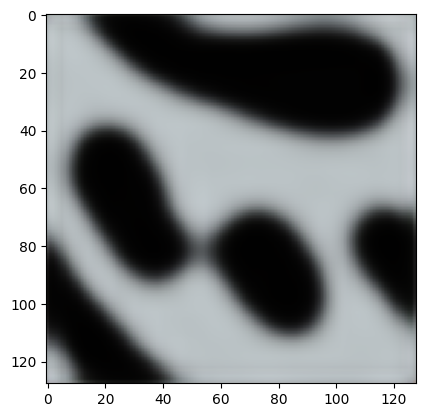

In [ ]:
plt.imshow(outputs_1[9])

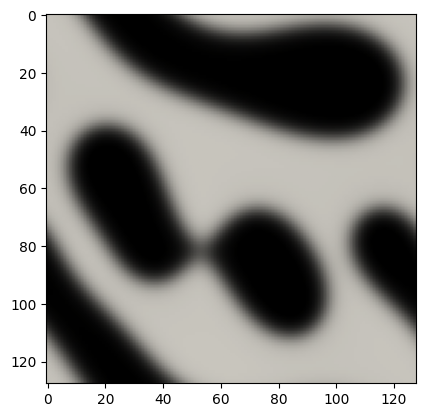

In [ ]:
plt.imshow(Y_test_1[380])

# **For T+100th = 510th frame, t=1 model**

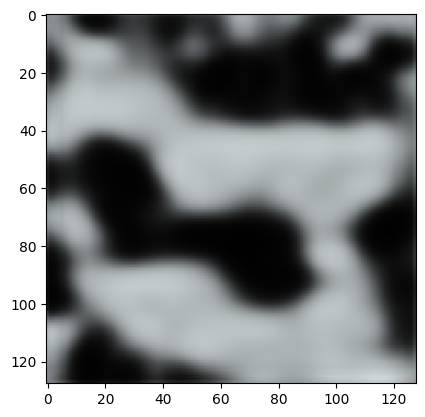

In [ ]:
plt.imshow(outputs_1[99])

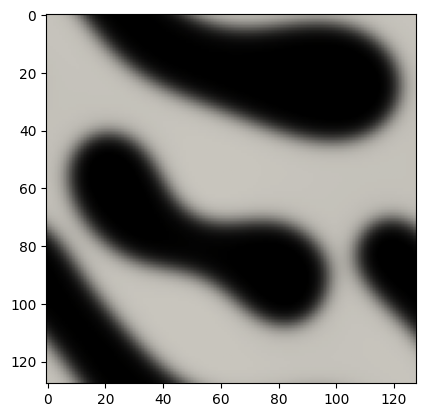

In [ ]:
plt.imshow(Y_test_1[470])

# **For T+10=420th frame , t=5 model**

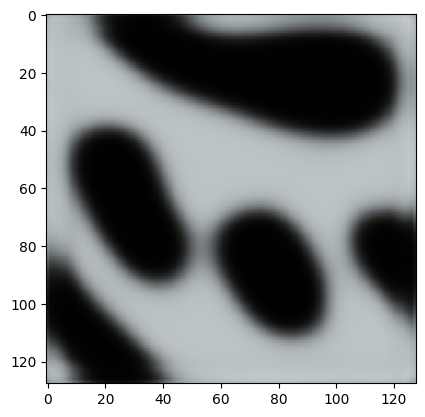

In [ ]:
plt.imshow(outputs_5[2])

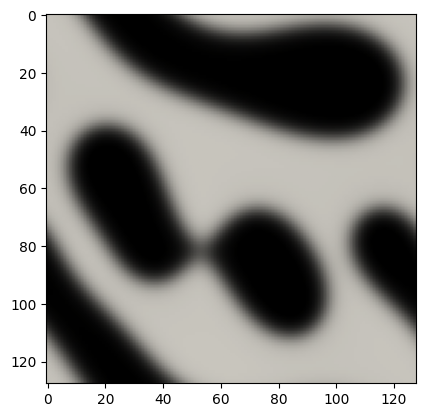

In [ ]:
plt.imshow(Y_test_5[44])

# **For T+10th = 420th frame, t=10 model**

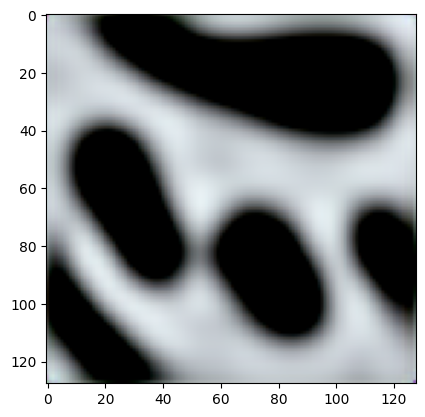

In [ ]:
plt.imshow(outputs_10[1])

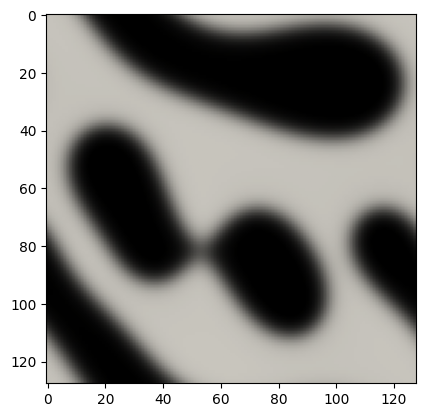

In [ ]:
plt.imshow(Y_test_10[2])

# **At T+100th = 510th frame, t=5 model**

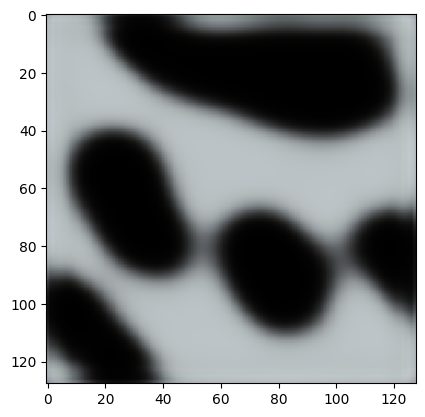

In [ ]:
plt.imshow(outputs_5[19])

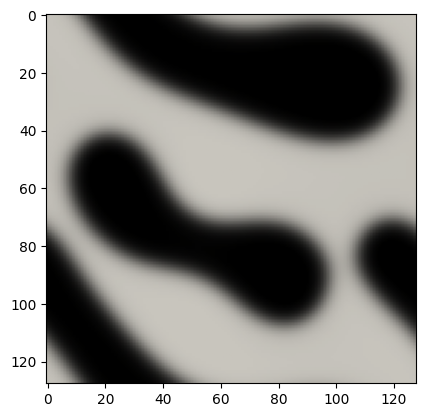

In [ ]:
plt.imshow(Y_test_5[63])

# **For T+100th=510th Frame, t=10 model**

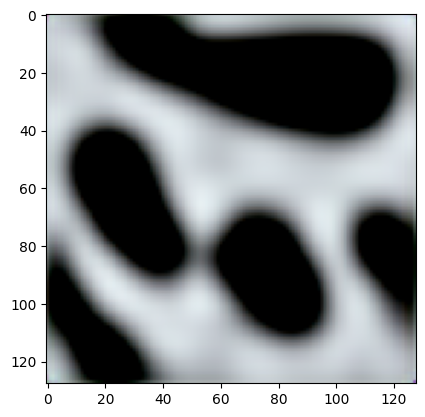

In [ ]:
plt.imshow(outputs_10[-1])

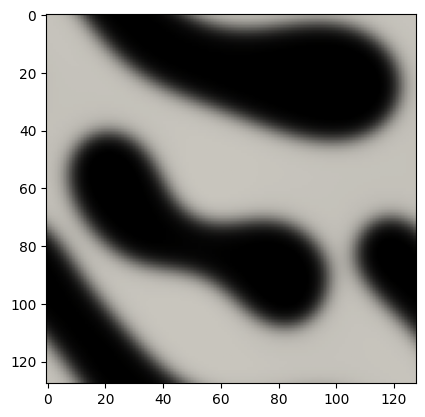

In [ ]:
plt.imshow(Y_test_10[10])

**T=420 comparison**

In [ ]:
all_predictions_10 = []
all_predictions_10.append(outputs_1[9])
all_predictions_10.append(outputs_5[2])
all_predictions_10.append(outputs_10[1])

In [ ]:
initial_images_10 = []
initial_images_10.append(Y_test_1[380])
initial_images_10.append(Y_test_5[44])
initial_images_10.append(Y_test_10[2])


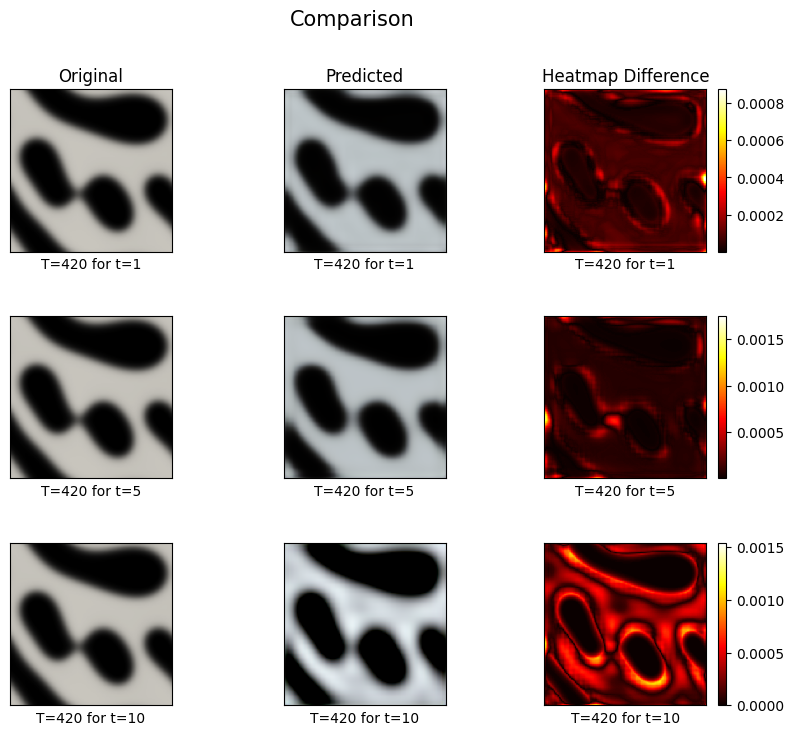

In [ ]:
pred_imgs = []
heatmaps = []
original_imgs = []
for i in range(0,3):
  original_imgs.append(initial_images_10[i])
  pred_imgs.append(all_predictions_10[i])

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(initial_images_10[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(all_predictions_10[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])


# Generate random images for demonstration (replace with your own images)
original_images = initial_images_10
prediction_images = all_predictions_10

# Create a grid of subplots
fig, axs = plt.subplots(3,3,figsize=(10,8))

for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid
t = [1, 5, 10]
for i in range(0,3):
  for j in range(0,3):
    if j==0 :
      h=axs[i,0].imshow(original_imgs[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])

    elif j==1 :
      h=axs[i,1].imshow(prediction_images[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    else:
      h = axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      fig.colorbar(h, ax=axs[i,2])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    axs[i,j].set_xlabel(f"T=420 for t={t[i]}")

# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.4, wspace=0.2)


fig.suptitle("Comparison", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Predicted')
axs[0,2].title.set_text('Heatmap Difference')


plt.show()

**T=510 comparison**

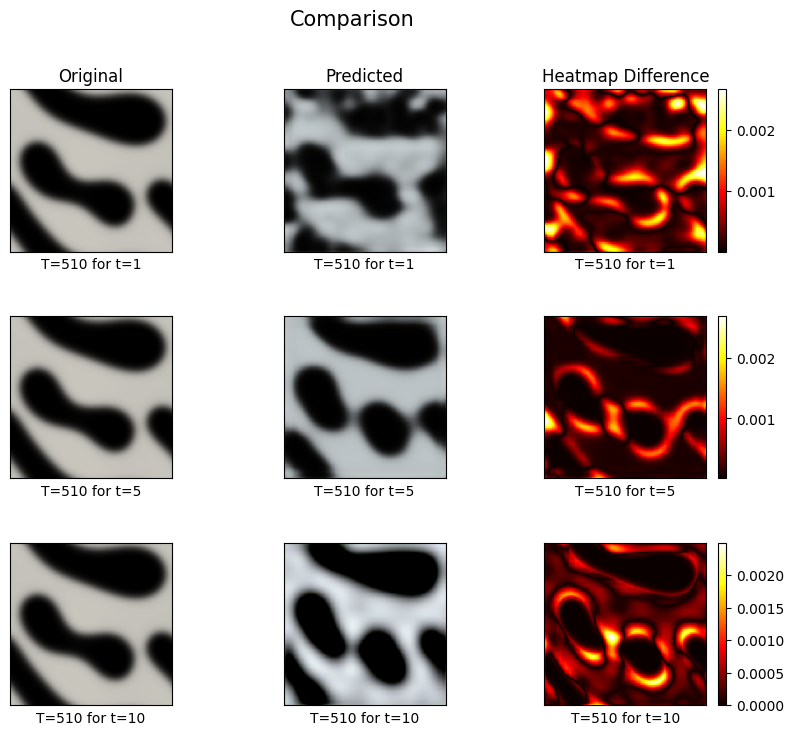

In [ ]:
all_predictions_100 = []
all_predictions_100.append(outputs_1[99])
all_predictions_100.append(outputs_5[19])
all_predictions_100.append(outputs_10[9])

initial_images_100 = []
initial_images_100.append(Y_test_1[470])
initial_images_100.append(Y_test_5[64])
initial_images_100.append(Y_test_10[10])

pred_imgs = []
heatmaps = []
original_imgs = []
for i in range(0,3):
  original_imgs.append(initial_images_100[i])
  pred_imgs.append(all_predictions_100[i])

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(initial_images_100[i], dtype=tf.float32)
  image2 = tf.convert_to_tensor(all_predictions_100[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])


# Generate random images for demonstration (replace with your own images)
original_images = initial_images_100
prediction_images = all_predictions_100

# Create a grid of subplots
fig, axs = plt.subplots(3,3,figsize=(10,8))

for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid
t = [1, 5, 10]
for i in range(0,3):
  for j in range(0,3):
    if j==0 :
      h=axs[i,0].imshow(original_imgs[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])

    elif j==1 :
      h=axs[i,1].imshow(prediction_images[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    else:
      h = axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      fig.colorbar(h, ax=axs[i,2])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    axs[i,j].set_xlabel(f"T=510 for t={t[i]}")

# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.4, wspace=0.2)


fig.suptitle("Comparison", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Predicted')
axs[0,2].title.set_text('Heatmap Difference')


plt.show()


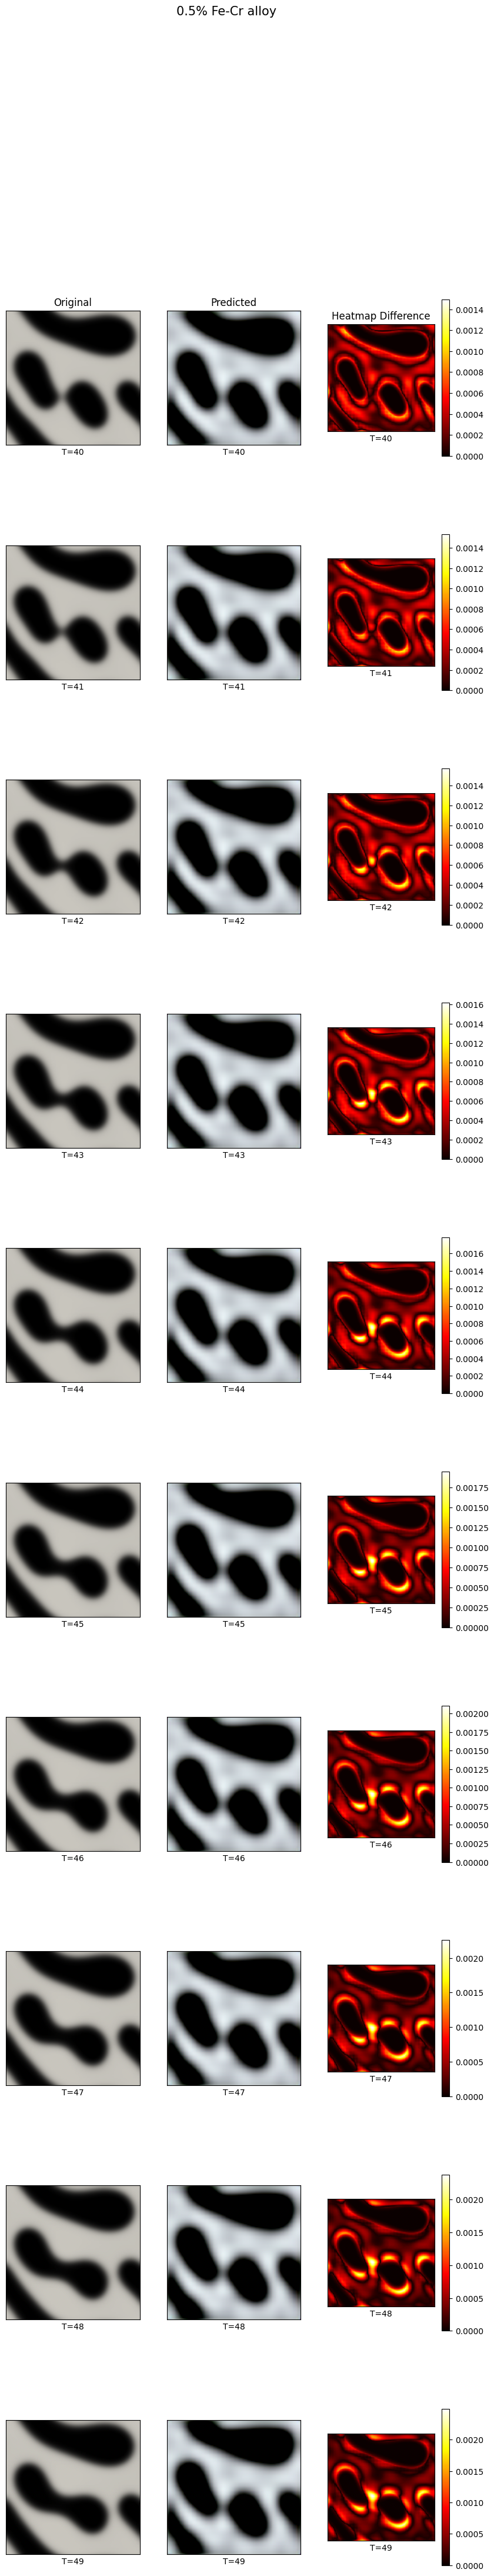

In [ ]:
predicted_imgs = []
heatmaps = []
original_imgs = []
for i in range(0,10):
  original_imgs.append(Y_test_10[i+1])
  predicted_imgs.append(outputs_10[i])

  # Convert the NumPy arrays to TensorFlow tensors
  image1 = tf.convert_to_tensor(Y_test_10[i+1], dtype=tf.float32)
  image2 = tf.convert_to_tensor(outputs_10[i], dtype=tf.float32)

  # Preprocess the images
  image1 = tf.image.resize(image1, (256, 256)) / 255.0
  image2 = tf.image.resize(image2, (256, 256)) / 255.0

  # Calculate the absolute difference between the two images
  difference = tf.abs(image1 - image2)

  # Convert the difference tensor to grayscale
  difference_gray = tf.image.rgb_to_grayscale(difference)

  # Reshape the grayscale tensor to a 2D heatmap
  heatmap = tf.reshape(difference_gray, (256,256))
  heatmaps.append(heatmap)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec



# Create a grid of subplots
fig, axs = plt.subplots(10,3,figsize=(10,50))

for ax in axs.flat:
    ax.label_outer()
# Display the images on the grid

for i in range(0,10):
  for j in range(0,3):
    if j==0 :
      h=axs[i,0].imshow(original_imgs[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])

    elif j==1 :
      h=axs[i,1].imshow(predicted_imgs[i])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    else:
      h = axs[i,2].imshow(heatmaps[i], cmap='hot', interpolation='nearest')
      fig.colorbar(h, ax=axs[i,2])
      axs[i,j].set_xticks([])
      axs[i,j].set_yticks([])
    axs[i,j].set_xlabel(f"T={40+i}")

# Optional: Adjust spacing and remove axis labels
plt.subplots_adjust(hspace=0.5)



# axs[0,0].set_xlabel('T=10')
# axs[1,0].set_xlabel('T=30')
# axs[2,0].set_xlabel('T=60')
# cbar = fig.colorbar(h, ax=axes[i,2])


fig.suptitle("0.5% Fe-Cr alloy", fontsize=15)
axs[0,0].title.set_text('Original')
axs[0,1].title.set_text('Predicted')
axs[0,2].title.set_text('Heatmap Difference')


plt.show()